# PROJECT 2 : Twitter API: tweet archive of Twitter user @dog_rates data

# Table of Contents
1. `Introduction`
2. `Data Gathering`
3. `Data Assessing`
4. `Data Cleaning`
5. `Store Data`
6. `Data Analysis, Insights and Visualization`

# `INTRODUCTION`

The dataset that will be wrangled (and analyzed and visualizied) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

# `DATA GATHERING`

In [1]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import requests
import os
import re
import seaborn as sns
import json
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

#Do not truncate data in cells
pd.set_option('display.max_colwidth', None)

#Don not limit number of displayed columns
pd.set_option('display.max_columns', None)

## Import the twitter_archive_enhanced.csv

In [2]:
twitter_archived_enhanced = pd.read_csv('twitter_archive_enhanced.csv')

## Import Image Predictions

In [3]:
folder_name = 'image_predictions'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode = 'wb') as file:
          file.write(response.content)

In [4]:
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

## Import the Tweet_json.txt file

In [5]:
#I was not granted assess to Twitter API, tweet_json was directly loaded
twitter_extra = pd.read_json('tweet_json.txt', lines=True)

In [6]:
#Extract the needed columns from the dataset and store as the same name
twitter_extra = pd.DataFrame(twitter_extra, columns = ['id','retweet_count','favorite_count'])

# `DATA ASSESSING`

### Quality

##### `Enhanced Twitter Archive`:

1. Tweet_id column dtype is integer.
2. Timestamp column dtype is not in datetime.
3. There are 78 replies to be remoed from the dataset.
4. There are 181 retweets to be removed from the dataset. 
5. Not every tweet has identified dog stages.
6. Wrong ratings i.e. the numerator and denominator ratings were given in different columns
7. Capitalize first letters in name column
8. Identify rating_denominator which is less than 10 and change to 10

##### `Image Predictions`

1. Tweet_id column dtype is integer instead of string.
2. Non-dog predictions.
3. Multiple predictions in for dogs in one single tweet.

##### `Twitter Extra Data`

1. Wrong id column name
2. Count columns have object type instead of integer type.
3. Wrong id dtype format, integer instead of string

#### ` All three tables`

1. Img_num is in wrong format, integer instead of string

### Tidiness

#### `Enhanced Twitter Archive`

1. Dog stages are not in one column.
2. There are 2 columns (numerator and denominator) related to rating, should be combined

#### `All three tables`

1. The three tables are not merged

### ENHANCED TWITTER ARCHIVE DATASET

In [7]:
#Checking for duplicates
twitter_archived_enhanced[twitter_archived_enhanced.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [8]:
twitter_archived_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archived_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
twitter_archived_enhanced[["rating_numerator", 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [11]:
twitter_archived_enhanced['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
           ... 
Goliath       1
Zara          1
Ralphson      1
Rodney        1
Combo         1
Name: name, Length: 957, dtype: int64

In [12]:
twitter_archived_enhanced.query

<bound method DataFrame.query of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000 

### IMAGE PREDICTION DATASET

In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
sum(image_predictions.duplicated())

0

### TWITTER EXTRA DATA

In [16]:
twitter_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [17]:
twitter_extra.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [18]:
sum(twitter_extra.duplicated())

0

In [19]:
twitter_extra[['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


# `DATA CLEANING`

### Make a copy of all the datasets before cleaning

In [20]:
archived_clean = twitter_archived_enhanced.copy()
image_clean = image_predictions.copy()
extra_clean = twitter_extra.copy()

## Data 1: Archive_clean

#### 1. Enhanced Twitter Archive table: the ratings are not all correct.

In [21]:
archived_clean.query('rating_numerator >= 15')[['rating_numerator']]

,rating_numerator
55,17
188,420
189,666
285,15
290,182
291,15
313,960
340,75
433,84
516,24


##### Define
Change timestamp from integer to datetime

##### Code

In [22]:
archived_clean['timestamp'] = pd.to_datetime(archived_clean['timestamp'])

##### test

In [23]:
archived_clean['timestamp']

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2356, dtype: datetime64[ns, UTC]

##### Define
Change tweet_id dtype from int64 to string

##### Code

In [24]:
archived_clean['tweet_id'] = archived_clean['tweet_id'].apply(str)

##### Test

In [25]:
archived_clean['tweet_id']

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: object

##### Define
Capitalize first letters in name column

##### Code

In [26]:
archived_clean['name'] = [name.capitalize() for name in archived_clean['name']]

##### Define
Remove all retweets

##### Code

In [27]:
archived_clean = archived_clean[archived_clean['retweeted_status_id'].isnull()]
archived_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True, axis = 1)

##### Define
Change None to NaN

##### Code

In [28]:
def change_to_null(item):
    if item == 'None':
        item = np.NaN
    return item

archived_clean['name'] = [change_to_null(item) for item in archived_clean['name']]

archived_clean['pupper'] = [change_to_null(item) for item in archived_clean['pupper']]
archived_clean['doggo'] = [change_to_null(item) for item in archived_clean['doggo']]
archived_clean['floofer'] = [change_to_null(item) for item in archived_clean['floofer']]
archived_clean['puppo'] = [change_to_null(item) for item in archived_clean['puppo']]

##### Define
delete replies columns.

##### Code

In [29]:
archived_clean = archived_clean[archived_clean['in_reply_to_status_id'].isnull()]
archived_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True)

##### Test

In [30]:
list(archived_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

##### Define
Identify rating_denominator which is less than 10 and change to 10

##### Code

In [31]:
x = archived_clean[archived_clean['rating_denominator'] <= 10].index

In [32]:
archived_clean.loc[x, 'rating_denominator'] = 10

##### Define
Create a new column named RATING

##### Code

In [33]:
archived_clean['rating'] = archived_clean['rating_numerator'] / archived_clean['rating_denominator']

##### Test

In [34]:
archived_clean["rating"].head(5)

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating, dtype: float64

##### Define
Drop the rating_numerator and rating_denominator 

##### Code

In [35]:
archived_clean.drop(columns = ['rating_numerator', 'rating_denominator'], axis=1, inplace = True)

##### Test

In [36]:
list(archived_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'rating']

In [37]:
archived_clean.shape

(2097, 11)

##### Define
1. Combine all dog stages into a column
2. Replace None in stage columns with empty string.

##### Code

In [38]:
for col in ['floofer', 'pupper', 'puppo','doggo']:
    archived_clean[col].replace('None', '', inplace = True)  

In [39]:
archived_clean['stage'] = archived_clean['doggo'] + archived_clean['floofer'] + archived_clean['pupper'] + archived_clean['puppo']

##### Define
1. Correct multiple stages in a tweet.
2. Remove missing values

In [40]:
#Correct multiple stages in a tweet.
archived_clean.loc[archived_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
archived_clean.loc[archived_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
archived_clean.loc[archived_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

#Remove missing values
archived_clean.loc[archived_clean.stage == '', 'stage'] = np.nan

##### Test

In [41]:
list(archived_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'rating',
 'stage']

##### Define
Drop doggo, floofer, pupper and puppo columns

##### Code

In [42]:
archived_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace = True)

##### Test

In [43]:
list(archived_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'name',
 'rating',
 'stage']

##### Define
Delete row with no rating in texts.

##### Code

In [44]:
archived_clean = archived_clean[archived_clean['expanded_urls'] != 'https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1']

## DATASET 2: IMAGE_CLEAN

##### Define
Convert tweet_id to string

##### Code

In [45]:
image_clean['tweet_id'] = image_clean['tweet_id'].apply(str)

##### Define
Drop p2 and p3 related columns

##### Code

In [46]:
image_clean = image_clean.drop(columns = ['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'])

##### Test

In [47]:
list(image_clean)

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog']

##### Define
#Remove every tweet that doesn't have dog stage identity

##### Code

In [48]:
image_clean = image_clean[image_clean['p1_dog'] == True]

##### Test

In [49]:
image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True
...,...,...,...,...,...,...
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True


## Dataset 3: Extra_clean Dataset

In [50]:
extra_clean

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


##### Define
Rename the id column to tweet_id

##### Code

In [51]:
extra_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

##### Test

In [52]:
list(extra_clean)

['tweet_id', 'retweet_count', 'favorite_count']

In [53]:
extra_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


##### Define
Change tweet_id dtype from integer to string (.astype or apply(str) or map(str))

##### Code

In [54]:
extra_clean['tweet_id'] = extra_clean['tweet_id'].astype(str)

##### Test

In [55]:
extra_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [56]:
extra_clean.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


## Merge All Dataset to one

##### Define
Combine all three datasets to one

##### Code

In [57]:
final_data = archived_clean.merge(image_clean, how = 'left', on = 'tweet_id')
final_data = final_data.merge(extra_clean, how = 'left', on = 'tweet_id')

##### Define
Convert img_num to string

##### Code

In [58]:
final_data['img_num'] = final_data['img_num'].map(str)

##### Test

In [59]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2095
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2096 non-null   object             
 1   timestamp       2096 non-null   datetime64[ns, UTC]
 2   source          2096 non-null   object             
 3   text            2096 non-null   object             
 4   expanded_urls   2093 non-null   object             
 5   name            1493 non-null   object             
 6   rating          2096 non-null   float64            
 7   stage           0 non-null      object             
 8   jpg_url         1462 non-null   object             
 9   img_num         2096 non-null   object             
 10  p1              1462 non-null   object             
 11  p1_conf         1462 non-null   float64            
 12  p1_dog          1462 non-null   object             
 13  retweet_count   2096 non-null   i

In [60]:
final_data.describe()

,rating,p1_conf,retweet_count,favorite_count
count,2096.000000,1462.000000,2096.000000,2096.000000
mean,1.168013,0.614867,2842.233779,8982.359256
std,3.966613,0.260251,4710.290609,12202.365447
min,0.000000,0.044333,16.000000,81.000000
25%,1.000000,0.392734,643.750000,2045.750000
50%,1.100000,0.615709,1404.000000,4195.500000
75%,1.200000,0.853256,3286.500000,11425.000000
max,177.600000,0.999956,79515.000000,132810.000000


In [61]:
#Check for rows with no ratings in text
final_data[final_data['expanded_urls'] == 'https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1']

,tweet_id,timestamp,source,text,expanded_urls,name,rating,stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count


# `STORING DATA`

In [62]:
final_data.to_csv("twitter_archive_master.csv", index = False)

# `ANALYSING DATA AND DATA VISUALIZATION`

#### Exploratory Data Analysis

In [63]:
df = pd.read_csv('twitter_archive_master.csv')

#### Insight 1
Top 3 dog names are `A, Lucy and Charlie`

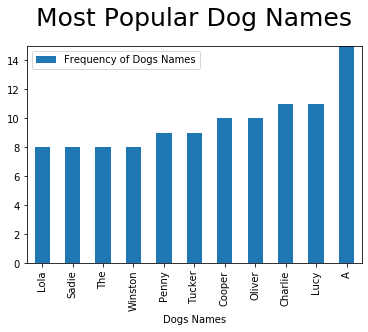

In [64]:
named_dogs = df.query('name == name')
named_dogs_group = named_dogs.groupby('name').count()[['tweet_id']]
named_dogs_group.rename(columns={'tweet_id':'name_count'}, inplace=True)
named_dogs_group.query('name_count >= 8').sort_values(by=['name_count']).plot.bar()
plt.ylim(top=15)
plt.title("Most Popular Dog Names",{'fontsize': 25},pad=20)
plt.xlabel("Dogs Names")
plt.legend(['Frequency of Dogs Names']);

#### Insight 2
Top 5 rated breeds are `Dumber, Pomeranian, Saluki, Briard and Tibetian mastiff`

In [65]:
breed_ratings = df.query('p1 == p1')[['rating', 'p1']].groupby('p1').mean() * 10

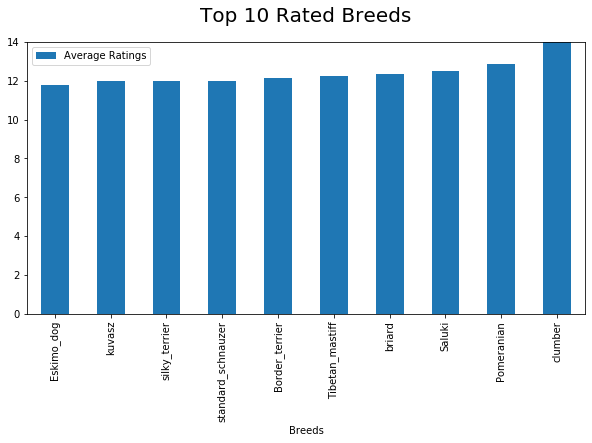

In [66]:
breed_ratings.sort_values(by=['rating']).tail(10).plot.bar(figsize=(10,5))
plt.ylim(top=14)
plt.title("Top 10 Rated Breeds",{'fontsize': 20},pad=20)
plt.xlabel("Breeds")
plt.legend(["Average Ratings"]);

#### Insight 3
Least rated breed is the `Japanese Spaniel` with an `average rating of 5`

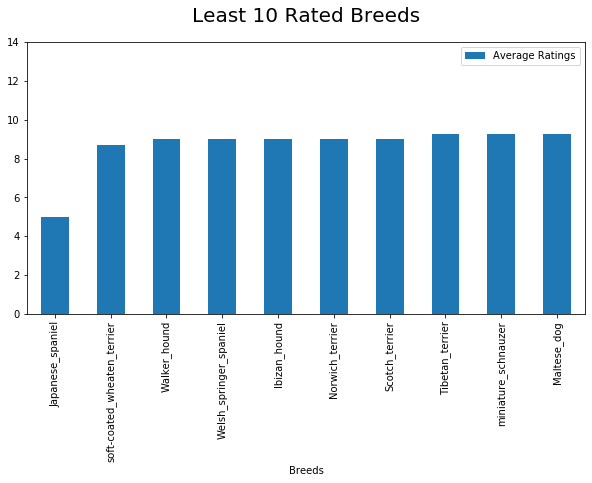

In [67]:
breed_ratings.sort_values(by=['rating']).head(10).plot.bar(figsize=(10,5))
plt.ylim(top=14)
plt.title("Least 10 Rated Breeds",{'fontsize': 20},pad=20)
plt.xlabel("Breeds")
plt.legend(["Average Ratings"]);

#### Insight 4
Dog breed with the highest retweet count is the `Labrador retriever` with a count of `79515`

In [68]:
df[df.retweet_count == df.retweet_count.max()]

,tweet_id,timestamp,source,text,expanded_urls,name,rating,stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
824,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,NaN,1.3,NaN,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1.0,Labrador_retriever,0.825333,True,79515,131075


In [69]:
df[df.favorite_count == df.favorite_count.max()]

,tweet_id,timestamp,source,text,expanded_urls,name,rating,stage,jpg_url,img_num,p1,p1_conf,p1_dog,retweet_count,favorite_count
325,822872901745569793,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,NaN,1.3,NaN,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,Lakeland_terrier,0.196015,True,48265,132810
